# A Review of tools and functions

*Note* :Please first mount the Google Drive

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

##fetching data

In [0]:
subj_1 = datafetch.fetch_subject(1)

In [3]:
subj_1.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

##scalp map

In [0]:
from plotters import scalp_plotter

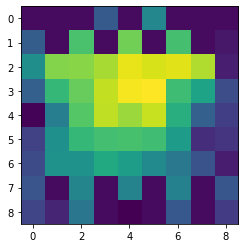

In [5]:
mat = scalp_plotter(subj_1['test_data'][43], 1025)
# You should pass the whole channels with all data
# the secend input of the function shows the time in which you 
# want to see the scalp map
plt.imshow(mat)

## Hilbert Space

In [0]:
from plotters import Hilbert_generator, Hilbert_concat, data_to_HilbertMat

(-0.09843750000000001, 2.0671875, -0.09843750000000001, 2.0671875)

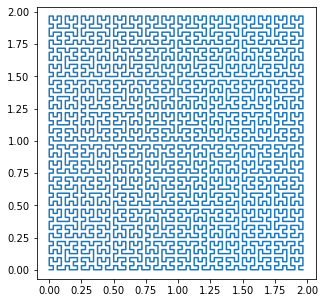

In [7]:
plt.figure(figsize=(5,5))
x,y = Hilbert_generator(n=5)
plt.plot(x,y)
plt.axis('equal')

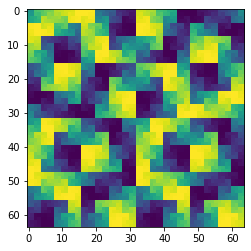

In [8]:
mat = data_to_HilbertMat(x,y,test=True)
plt.imshow(mat)

In [0]:
x,y =Hilbert_concat(x,y)

In [0]:
data = subj_1['test_data'][23][:,14]

In [0]:
mat = data_to_HilbertMat(x,y,data =data, double_factor=2)

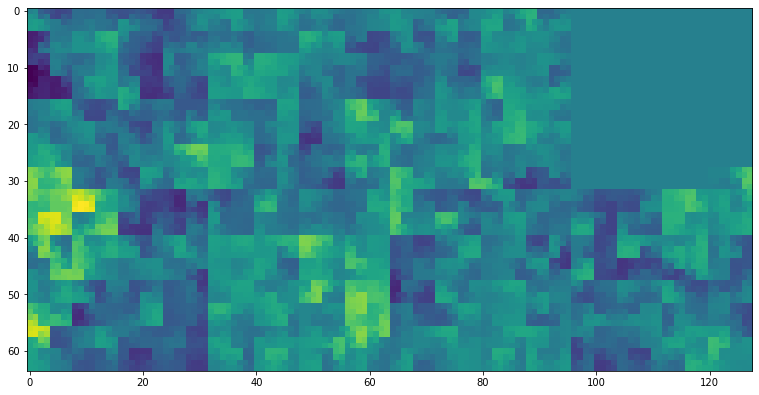

In [12]:
plt.figure(figsize=(13,13))
plt.imshow(mat)


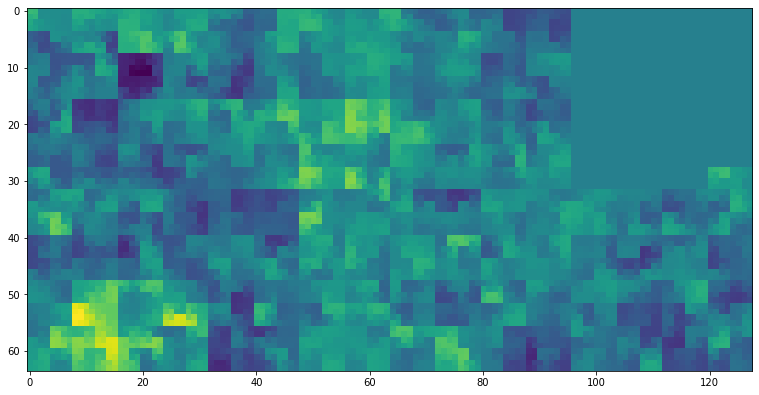

In [13]:
mat = data_to_HilbertMat(x,y,data =np.roll(data,400), double_factor=2)
plt.figure(figsize=(13,13))
plt.imshow(mat)

## Garmian Angular Field

In [0]:
from plotters import Garmian_calculator
from plotters import Scaler

In [0]:
mat = Garmian_calculator(subj_1['test_data'][34][:,6])

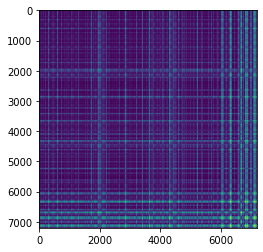

In [16]:
plt.imshow(mat)

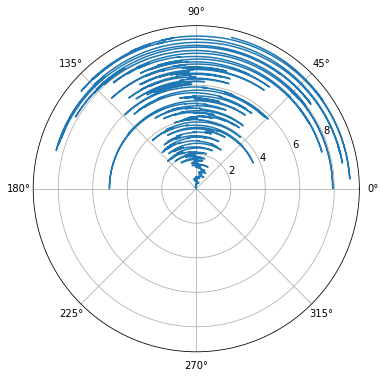

In [17]:
data = subj_1['test_data'][34][:,25]
data = Scaler(data)
phi = np.arccos(data)
t = np.linspace(0,3,len(data))
plt.figure(figsize=(6,6))
plt.polar(phi,t*3)

## Markov Transition Matrix

In [0]:
from plotters import Markov_matrix_generator, bin_creator

In [0]:
data = subj_1['test_data'][34][:,58]

In [0]:
bins = bin_creator(data, 120)

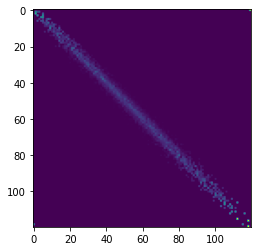

In [21]:
mat = Markov_matrix_generator(bins, data, normal=True)
plt.imshow(mat)

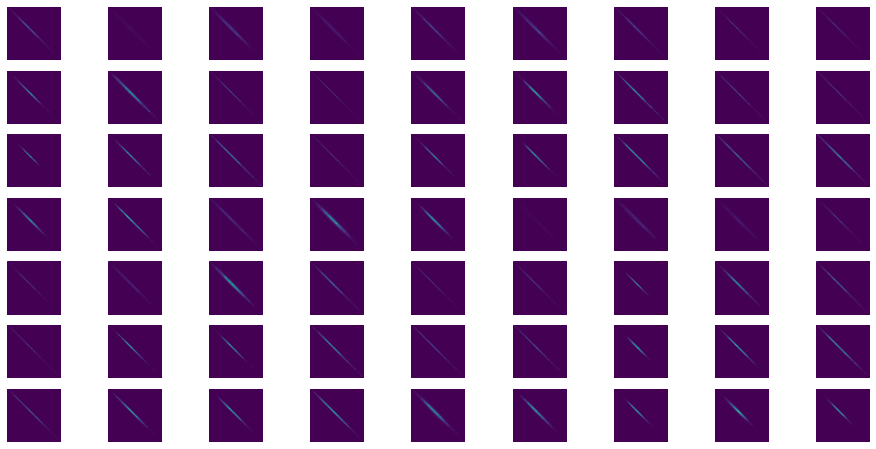

In [22]:
fig  = plt.figure(figsize=(16,8))
for i in range(63):
  ax = fig.add_subplot(7,9,i+1)
  ax.imshow(Markov_matrix_generator(bins, subj_1['test_data'][34][:,i], normal=False))
  ax.axis('off')

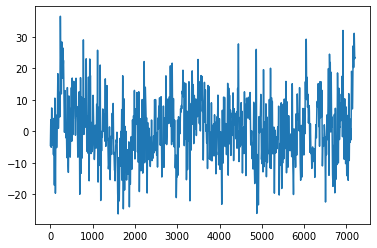

In [23]:
plt.plot(data)

The result is very Weird! Isn't it?

# Markov Transition Field

In [24]:
! pip install pyts

     |████████████████████████████████| 2.5MB 2.9MB/s 
     |████████████████████████████████| 2.5MB 45.7MB/s 
  Found existing installation: numba 0.47.0
    Uninstalling numba-0.47.0:
      Successfully uninstalled numba-0.47.0


In [0]:
from pyts.image import MarkovTransitionField

In [0]:
mtf = MarkovTransitionField(image_size=24)
X_mtf = mtf.fit_transform([subj_1['test_data'][42][:,i] for i in range(12)])

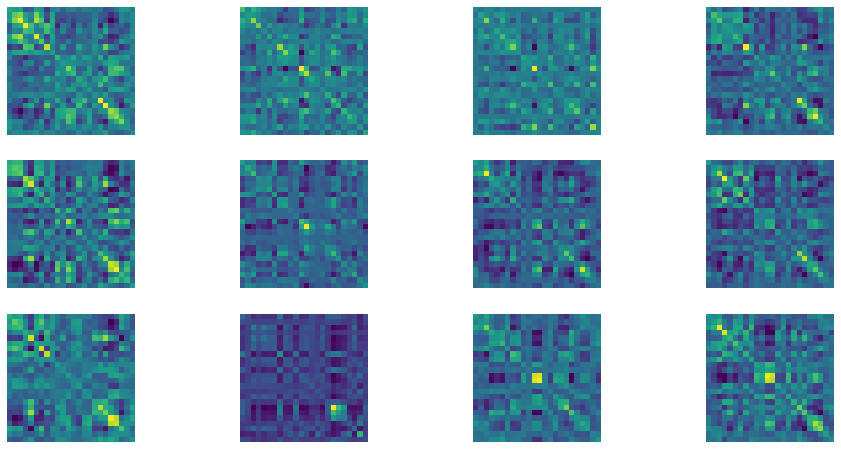

In [30]:
fig  = plt.figure(figsize=(16,8))
for i in range(12):
  ax = fig.add_subplot(3,4,i+1)
  plt.imshow(X_mtf[i])
  ax.axis('off')


# Time Frequency

In [0]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [0]:
fs = 2400
x = subj_1['test_data'][4][:,15]

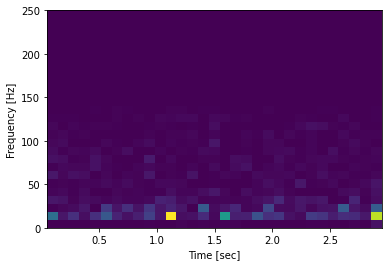

In [66]:


f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0,250])
plt.show()



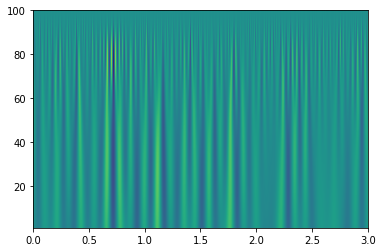

In [81]:
from scipy import signal
import matplotlib.pyplot as plt

widths = np.arange(1, 100)
cwtmatr = signal.cwt(subj_1['test_data'][43][:,32], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[0, 3, 1, 100], aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()


In [83]:
cwtmatr.shape

(99, 7200)